In [ ]:
import sys
import subprocess
import importlib.metadata

# List of package names
packages = ["numpy", "matplotlib", "pandas", "yfinance"]    # Replace with your packages

# Check if packages are installed and collect missing ones
def install_missing_packages(package_list):
    missing_packages = []
    
    for package in package_list:
        try:
            importlib.metadata.version(package)
            print(f"{package} is already installed.")
        except importlib.metadata.PackageNotFoundError:
            print(f"{package} not found.")
            missing_packages.append(package)
    
    # Install missing packages in one pip call
    if missing_packages:
        print(f"Installing missing packages: {', '.join(missing_packages)}")
        subprocess.check_call([sys.executable, "-m", "pip", "install","--user"] + missing_packages)
        print("Packages installed successfully")
    else:
        print("All packages are already installed.")

# Install missing packages
install_missing_packages(packages)

# Manual Step: Restart Kernel from the Jupyter Toolbar

 Stock that experienced the largest single-day High-Low price difference is: FICO
 Company name : Fair Isaac Corporation
 Date of largest High-Low difference is: 2022-01-28
 Percentage fluctuation difference is : 16.74




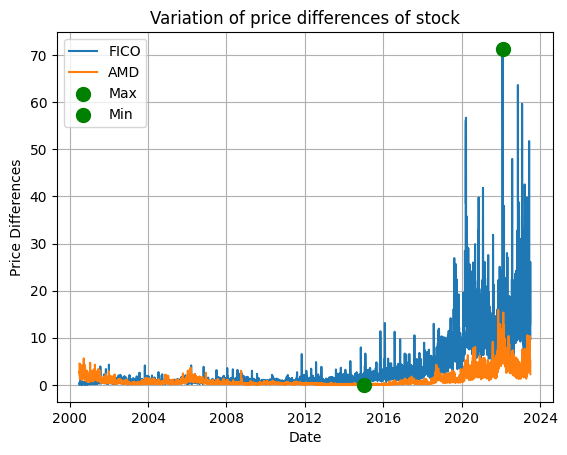

In [2]:
import os
import yfinance as yf
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Defining the functions

# This function downloads the stock data based on the stock name(tickers), start date and end date and creates its dataframe
def download_and_process_stock_data(Tickers,start_date,end_date):
    # check if data files already exist
    if Path('StockData/Raw_Data.csv').is_file() and Path('StockData/Modified_Data.csv').is_file():
        # if data file already exists, return the dataframe
        dframe = pd.read_csv('StockData/Modified_Data.csv')
        return dframe
    else:
    
        # Create the 'data' directory if it doesn't exist, ignore error if it already exists
        os.makedirs('StockData', exist_ok=True)
        # download the stock data
        stock_data = yf.download(tickers=Tickers,start=start_date,end=end_date,group_by='ticker', auto_adjust=True)
        # Save the raw stock data to a CSV file
        stock_data.to_csv('StockData/Raw_Data.csv')
        # Load the saved stock data into dataframe for processing
        saved_stock_data = pd.read_csv('StockData/Raw_Data.csv',header=[0, 1], index_col=0)
        
   # Initialize an empty list to store modified Data for each stock ticker
    modified_data = []
   # Iterate through each ticker and reshape the data
    for ticker in stock_data.columns.levels[0]:
       ticker_data = saved_stock_data[ticker].copy()
       ticker_data['Stock'] = ticker
       ticker_data.reset_index(inplace=True)
       modified_data.append(ticker_data)
   # Concatenate all the dataframes into a single dataframe
    combined_df = pd.concat(modified_data, ignore_index=True)

   # Columns in desired format
    combined_df = combined_df[['Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

   # Calculate the price difference (high price - low price) for all stocks in the combined dataframe
    combined_df['Price Difference'] = combined_df['High'] - combined_df['Low']
 
   # Save the reshaped dataframe to a new CSV file
    combined_df.to_csv('StockData/Modified_Data.csv', index=False)

   # Return the reshaped dataframe
    modified_df = pd.read_csv('StockData/Modified_Data.csv')

    return modified_df


# This function visualizes and plot the max and min stock price difference on the graph
def visualize_min_max_price_diff(dataframe, stock_list):
    # Creating a new separate dataframe based on the stock list 
    selected_stock_df = dataframe[dataframe['Stock'].isin(stock_list)].copy()
    # Convert 'Date' to datetime in the new dataframe only
    selected_stock_df['Date'] = pd.to_datetime(selected_stock_df['Date'])

    # Initialize an empty dataframe to collect all stock data
    stock_list_data_combined_df = pd.DataFrame()
    
    # Create a canvas to plot the data
    plt.figure()

    # Iterate over each stock in the list of selected stocks
    for stock in stock_list:
        stock_data = selected_stock_df[selected_stock_df['Stock']==stock]
        # Append stock data to the combined dataframe
        stock_list_data_combined_df = pd.concat([stock_list_data_combined_df, stock_data], ignore_index=True)
        # Plot the graph as per the current stock 'Date' and 'Price Difference'
        plt.plot(stock_data['Date'],stock_data['Price Difference'],label=stock)
             
    # Finding the rows having the max and min price difference
    max_idx = stock_list_data_combined_df['Price Difference'].idxmax()
    min_idx = stock_list_data_combined_df['Price Difference'].idxmin()

    # Plotting the data on the graph by locating the max/min row Date value on x-axis and max/min row Price Diff value on y-axis
    plt.scatter(stock_list_data_combined_df.loc[max_idx,'Date'], stock_list_data_combined_df.loc[max_idx,'Price Difference'],
                    color='green', s=100, zorder=5, label= f'Max')     
    plt.scatter(stock_list_data_combined_df.loc[min_idx,'Date'], stock_list_data_combined_df.loc[min_idx,'Price Difference'],
                    color='green', s=100, zorder=5, label= f'Min')

    # Adding label as 'Date' on x-axis
    plt.xlabel('Date')
    # Adding label as 'Price Differences' on y-axis
    plt.ylabel('Price Differences')
    # Adding title of the visualization
    plt.title('Variation of price differences of stock')
    # Using legend() to identify which line corresponds to which stock
    plt.legend()
    # Using grid to interpret data easily
    plt.grid(True)


# calling the function and processing
TICKERS = ['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMD', 'ANSS', 'APH', 'AVIFY', 'BA', 'BCE',  
           'CDNS', 'CGNX', 'CHKP', 'CSCO', 'CSGP', 'CTSH', 'DASTY', 
           'DTEGY', 'ERIC', 'FDS', 'FICO', 'GD', 'GE', 'GIB', 'GLW', 'HEI', 'HPQ', 'IBM', 'IFNNY', 
           'INFY', 'INTC', 'INTU', 'JKHY', 'KKPNY', 'KLAC', 'KYOCY', 'LHX', 'LMT', 'LOGI', 'LRCX', 'MCHP', 
           'MRVL', 'MSFT', 'MSI', 'MU', 'NICE', 'NOC', 'NOK', 'NTTYY', 'NVDA', 'ORAN', 'ORCL', 'OTEX', 
           'PAYX', 'PTC', 'QCOM', 'RCI', 'ROP', 'SAP', 'SCMWY', 'SFTBF', 'SKM', 'SNPS', 'STM', 'SWKS', 'T', 
           'TDY', 'TEF', 'TER', 'TLK', 'TRMB', 'TSM', 'TTDKY', 'TU', 'TXN', 'TYL', 'VIV', 'VOD', 
           'VRSN', 'VZ', 'WDC', 'ZBRA']

BOLD  = '\033[1m'
ULINE = '\033[4m'
BLUE  = '\033[34m'
RED   = '\033[31m'

START = "2000-07-03"
END   = "2023-07-03"

# Calling the stock data download and processing method on the above mentioned tickers, start and end date
tickers_data = download_and_process_stock_data(TICKERS, START, END)

# This gives the maximum price difference value amongst the stock data 
max_diff = tickers_data['Price Difference'].max()

# This gives the row number which has highest price difference
max_val = tickers_data['Price Difference'].idxmax()
min_val =  tickers_data['Price Difference'].idxmin()

# This variable stores the Entire row values 
max_row_details = tickers_data.loc[[max_val]]
min_row_details = tickers_data.loc[[min_val]]


max_diff_percentage = (max_diff/max_row_details['Low'])*100
rounded_number = round(max_diff_percentage, 2)

# Extract the single value from the Series for 'Date'
date_value = (max_row_details['Date'].iloc[0]).split(' ')[0]

# Extract the single value from the Series for 'Stock'
Max_stock_value = max_row_details['Stock'].iloc[0]
Min_stock_value = min_row_details['Stock'].iloc[0]

print(f'{BOLD+RED} Stock that experienced the largest single-day High-Low price difference is:{BOLD+BLUE} {Max_stock_value}')
print(f"{BOLD+RED} Company name : {BOLD+BLUE}{yf.Ticker(Max_stock_value).info['longName']}")
print(f"{BOLD+RED} Date of largest High-Low difference is: {BOLD+BLUE}{date_value}")
print(f"{BOLD+RED} Percentage fluctuation difference is :{BOLD+BLUE} {rounded_number.iloc[0]}\n\n")

# List of stocks with min and max price difference
stock_list = [Max_stock_value,Min_stock_value]

visualize_min_max_price_diff(tickers_data, stock_list)